[View in Colaboratory](https://colab.research.google.com/github/kintarou/django-starter/blob/master/simulation.ipynb)

In [0]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
%precision 3
%matplotlib inline

In [0]:
population=stats.norm(loc=4,scale=0.8)

In [0]:
sample_mean_array=np.zeros(10000)

In [4]:
np.random.seed(1)
for i in range(0,10000):
  sample=population.rvs(size=10)
  sample_mean_array[i]=sp.mean(sample)
sample_mean_array  

array([3.922, 3.864, 4.07 , ..., 4.136, 4.575, 4.099])

In [5]:
sp.mean(sample_mean_array)

4.004

In [6]:
sp.std(sample_mean_array,ddof=1)

0.251

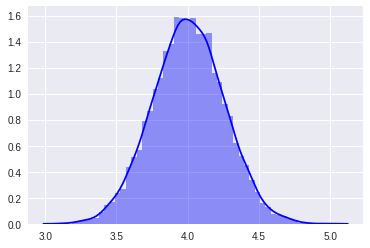

In [7]:
sns.distplot(sample_mean_array,color='blue')

In [8]:
size_array=np.arange(start=10,stop=100100,step=100)
size_array

array([    10,    110,    210, ...,  99810,  99910, 100010])

In [0]:
sample_mean_array_size=np.zeros(len(size_array))
np.random.seed(1)
for i in range(0,len(size_array)):
  sample=population.rvs(size=size_array[i])
  sample_mean_array_size[i]=sp.mean(sample)

Text(0,0.5,'sample mean')

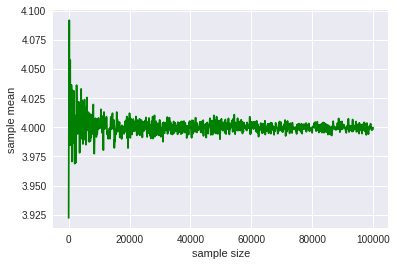

In [10]:
plt.plot(size_array,sample_mean_array_size,color='green')
plt.xlabel('sample size')
plt.ylabel('sample mean')

In [0]:
def calc_sample_mean(size, n_trial):
  sample_mean_array=np.zeros(n_trial)
  for i in range(0,n_trial):
    sample=population.rvs(size=size)
    sample_mean_array[i]=sp.mean(sample)
  return(sample_mean_array)  

In [12]:
np.random.seed(1)
sp.mean(calc_sample_mean(size=10,n_trial=10000))

4.004

In [20]:
np.random.seed(1)
size_10=calc_sample_mean(size=10,n_trial=10000)
size_10_df=pd.DataFrame({"sample_mean":size_10,"size":np.tile("size_10",10000)})
size_20=calc_sample_mean(size=20,n_trial=10000)
size_20_df=pd.DataFrame({"sample_mean":size_20,"size":np.tile("size_20",10000)})
size_30=calc_sample_mean(size=30,n_trial=10000)
size_30_df=pd.DataFrame({"sample_mean":size_30,"size":np.tile("size_30",10000)})
sim_result=pd.concat([size_10_df,size_20_df,size_30_df])
print(sim_result[:5])
print(sim_result[-5:])

   sample_mean     size
0     3.922287  size_10
1     3.864329  size_10
2     4.069530  size_10
3     3.857140  size_10
4     4.184654  size_10
      sample_mean     size
9995     3.980022  size_30
9996     3.770016  size_30
9997     3.930151  size_30
9998     4.075567  size_30
9999     3.976259  size_30


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


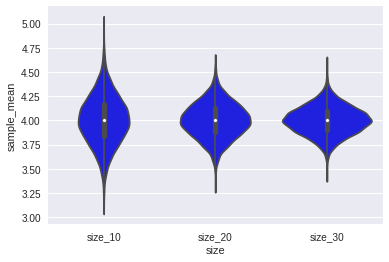

In [21]:
sns.violinplot(x="size",y="sample_mean",data=sim_result,color="blue")

In [22]:
size_array=np.arange(start=2,stop=102,step=2)
size_array

array([  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
        28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,
        54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,
        80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100])

In [0]:
sample_mean_std_array=np.ones(len(size_array))

In [0]:
np.random.seed(1)
for i in range(0,len(size_array)):
  sample_mean=calc_sample_mean(size=size_array[i],n_trial=100)
  sample_mean_std_array[i]=sp.std(sample_mean,ddof=1)

Text(0,0.5,'mean_std value')

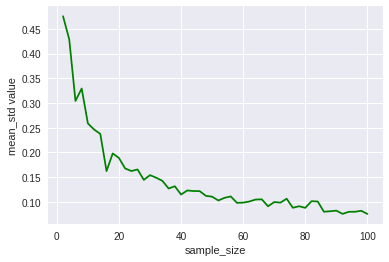

In [29]:
plt.plot(size_array,sample_mean_std_array,color='green')
plt.xlabel("sample_size")
plt.ylabel("mean_std value")

In [27]:
standard_error=0.8/np.sqrt(size_array)
standard_error

array([0.566, 0.4  , 0.327, 0.283, 0.253, 0.231, 0.214, 0.2  , 0.189,
       0.179, 0.171, 0.163, 0.157, 0.151, 0.146, 0.141, 0.137, 0.133,
       0.13 , 0.126, 0.123, 0.121, 0.118, 0.115, 0.113, 0.111, 0.109,
       0.107, 0.105, 0.103, 0.102, 0.1  , 0.098, 0.097, 0.096, 0.094,
       0.093, 0.092, 0.091, 0.089, 0.088, 0.087, 0.086, 0.085, 0.084,
       0.083, 0.083, 0.082, 0.081, 0.08 ])

Text(0,0.5,'mean_std value')

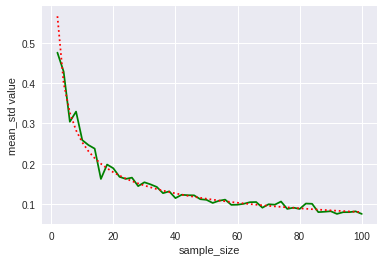

In [30]:
plt.plot(size_array,sample_mean_std_array,color='green')
plt.plot(size_array,standard_error,color='red',linestyle='dotted')
plt.xlabel("sample_size")
plt.ylabel("mean_std value")



In [0]:
sample_var_array=np.zeros(10000)
np.random.seed(1)
for i in range(0,10000):
  sample=population.rvs(size=10)
  sample_var_array[i]=sp.var(sample,ddof=0)

In [43]:
sp.mean(sample_var_array)

0.575

In [48]:
unbias_var_array=np.zeros(10000)
np.random.seed(1)
for i in range(0,10000):
  sample=population.rvs(size=10)
  unbias_var_array[i]=sp.var(sample,ddof=1)
sp.mean(unbias_var_array)  

0.639

In [45]:
size_array=np.arange(start=10,stop=100100,step=100)
size_array

array([    10,    110,    210, ...,  99810,  99910, 100010])

In [0]:
unbias_var_array_size=np.zeros(len(size_array))
np.random.seed(1)
for i in range(0,len(size_array)):
  sample=population.rvs(size=size_array[i])
  unbias_var_array_size[i]=sp.var(sample,ddof=1)

Text(0,0.5,'unbias var')

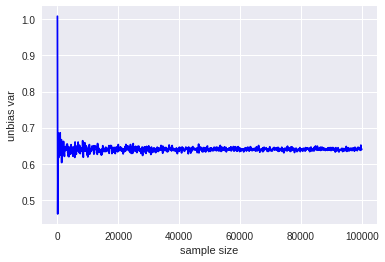

In [47]:
plt.plot(size_array,unbias_var_array_size,color='blue')
plt.xlabel('sample size')
plt.ylabel('unbias var')

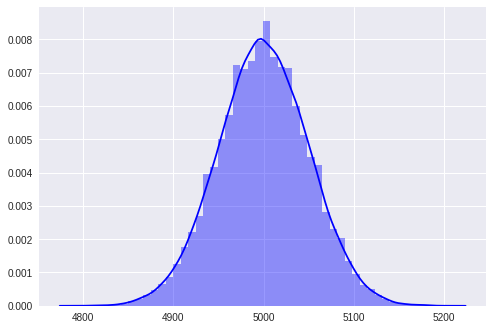

In [4]:
import numpy as np
import scipy as sp
import seaborn as sns
sns.set()
n_size=10000
n_trial=50000
coin=np.array([0,1])
count_coin=np.zeros(n_trial)
np.random.seed(1)
for i in range(0, n_trial):
  count_coin[i]=sp.sum(np.random.choice(coin,size=n_size,replace=True))
sns.distplot(count_coin,color='blue')  